# Contribution

## 1. H2O 분석
## 2. pycm 패키지를 활용하여서 통계량 값 한번에 쉽게 뽑기
## 3. Umap 과 MultiCore Tsne 를 활용한 데이터 차원 축소 후 비교
## 4. Kmeans 와 DBSCAN 분석
## 5. 실제 데이터와 생성된 데이터 간의 결과 분석
## 6. 데이터 상관관계 타원형으로 그리는 함수 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np , pandas as pd
from sklearn.cluster import KMeans
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt
import umap , os , re
from pycm import *

import h2o
h2o.init()



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-1ubuntu0.16.04.1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /home/gpuadmin/.local/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps4gyhgnh
  JVM stdout: /tmp/tmps4gyhgnh/h2o_gpuadmin_started_from_python.out
  JVM stderr: /tmp/tmps4gyhgnh/h2o_gpuadmin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Seoul
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_gpuadmin_prl8vn
H2O cluster total nodes:,1
H2O cluster free memory:,17.17 Gb
H2O cluster total cores:,32
H2O cluster allowed cores:,32
H2O cluster status:,"accepting new members, healthy"


In [3]:
fac_var = ['CNT_CONTACT_POS', 'CNT_ENG', 'DAYS_CONTACT_POS', 'DAYS_CALL_PAYMENT', 'EWS_C_N_P27000100', 'EWS_C_N_P42000200', 'C_N_PS0001777', 'A_K_D10220000_OPR', 'DAYS_CONTACT', 'MOB', 'EWS_C_K_D10220000_OPR', 'EWS_C_K_D10210D00_OPR', 'target']
num_var = ['SCORE_ORG', 'SCORE_NK0200_000', 'SCORE_RK0400_700', 'EWS_A_K_D1M232000_OPR', 'EWS_C_N_P32003000', 'AGE', 'CNT_Contact', 'EWS_A_K_D1M23200C_OPR', 'EWS_C_K_D10310000_OPR', 'EWS_A_K_D90232200_OPR', 'D_N_CA0000603', 'EWS_C_N_P32002600', 'EWS_D_N_P43004000', 'SCORE_RK0400_000', 'D_K_D10310000_OPR', 'D_K_L2Z000034', 'D_K_L20283000', 'EWS_D_K_L20283000', 'EWS_D_N_P43004500', 'D_K_L2Z000035', 'EWS_A_K_D10231000_OPR', 'EWS_D_K_L2Z000035', 'SC0000059', 'D_N_L24003800', 'SC0000063', 'EWS_A_K_D10232000_OPR', 'TF_N_CRT000021', 'SC0000055', 'SC0000049', 'D_N_P21010500', 'EWS_C_K_D10110000_OPR', 'EWS_A_N_L22002000']
col = fac_var + num_var

In [4]:

path = os.listdir()
p = re.compile(".*csv$")
directory = []
for i in path : 
    name = p.findall(i)
    if len(name) > 0 : 
        directory.append(name[0])
        
    
directory


['SN_M_W_Res_Generated.csv',
 'V0_SN_Generated_RSGAN_TF_Data.csv',
 'SN_Generated.csv',
 'V0_SN_Generated_RsGanGp.csv',
 'V0_SN_Generated_RaSGAN.csv',
 'V0_SN_Generated_RSGAN.csv',
 'V0_SN_Generated_V5.csv',
 'V0_SN_Generated_V3.csv',
 'wgan_loss_logs.csv',
 'credit44_sc.csv',
 'V0_SN_Generated_RsHinge.csv',
 'V0_SN_Generated_V2.csv']

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import EllipseCollection

def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec



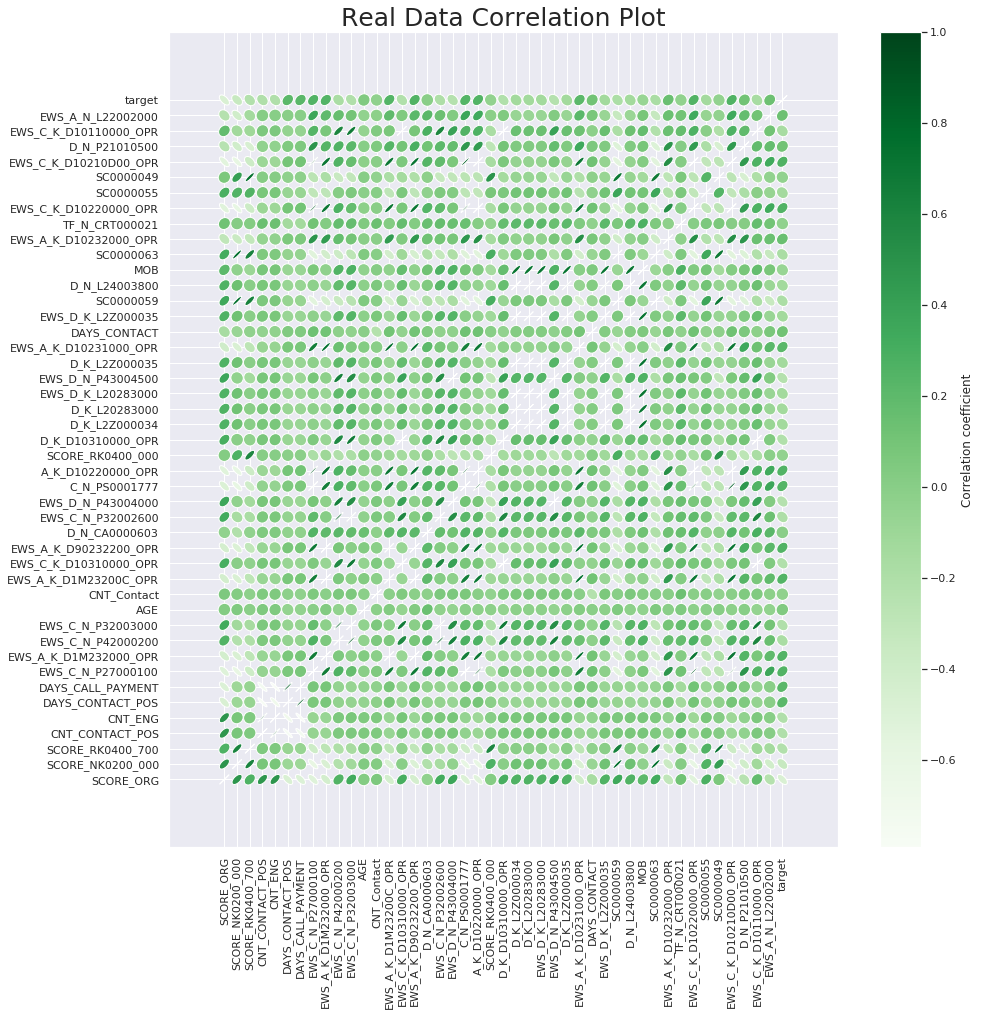

In [36]:
df = pd.read_csv('./credit44_sc.csv' ,usecols=col)
data = df.corr()
fig, ax = plt.subplots(1, 1 , figsize= (15,15))
m = plot_corr_ellipses(data, ax=ax, cmap='Greens')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.set_title("Real Data Correlation Plot" , fontsize = 25)
plt.savefig("./Real_Data_Corr.png")
ax.margins(0.1)


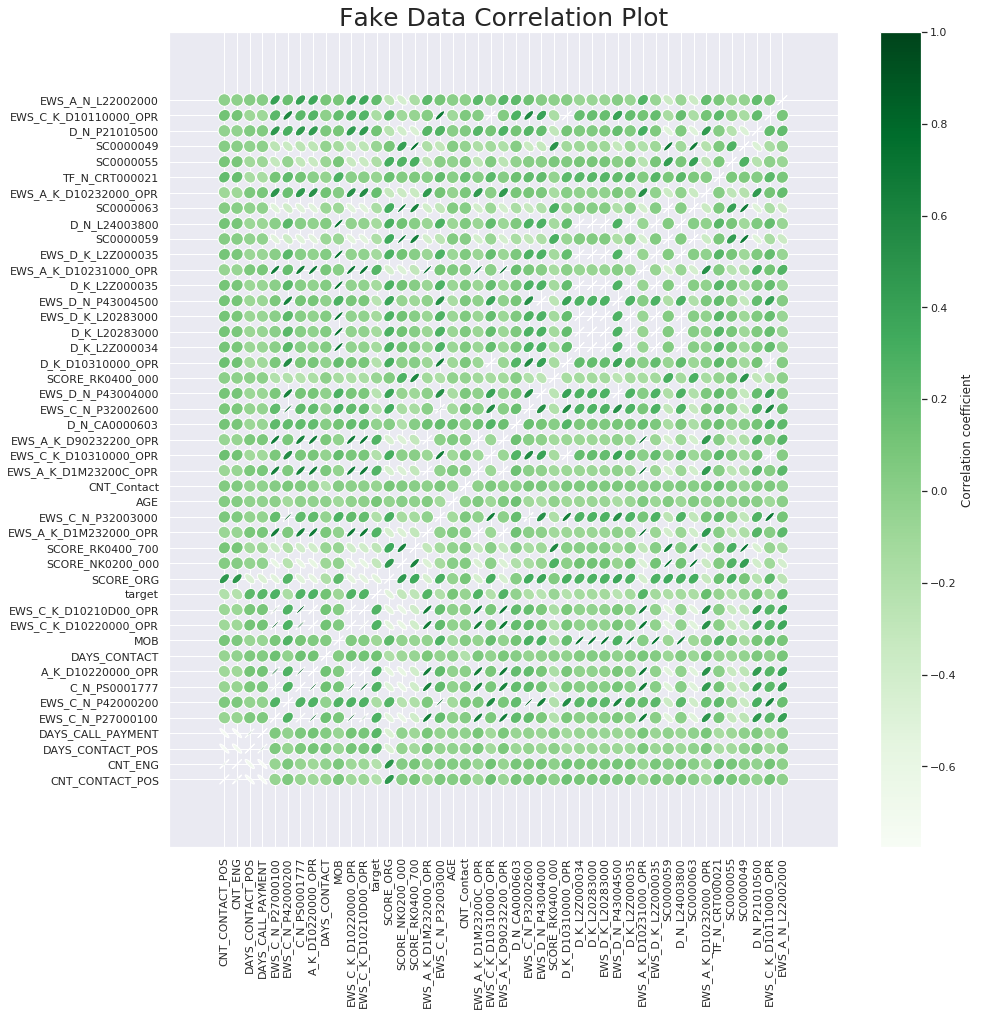

In [37]:
df = pd.read_csv('./V0_SN_Generated_RsGanGp.csv',usecols =col)
data = df.corr()
fig, ax = plt.subplots(1, 1 , figsize= (15,15))
m = plot_corr_ellipses(data, ax=ax, cmap='Greens')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.set_title("Fake Data Correlation Plot" , fontsize = 25)
plt.savefig("./Fake_Data_Corr.png")
ax.margins(0.1)

In [5]:
#real = h2o.import_file(path='./credit44_sc.csv' ,col_names=col)


real = pd.read_csv('./credit44_sc.csv' ,usecols=col)
#real.drop("SCORE_ORG" , axis= 1 , inplace = True)


y = "target"
real  = h2o.H2OFrame(real)
real[y] = real[y].asfactor()
x = list(real.columns)

x = x[:-1]
real = real.na_omit()
train_r , test_r = real.split_frame(ratios=[0.75], seed=1)
from h2o.estimators.gbm import H2OGradientBoostingEstimator
model_r = H2OGradientBoostingEstimator(distribution='bernoulli',
                                       balance_classes = True ,
                                       stopping_metric = "misclassification" ,
                                       ntrees=100,
                                       max_depth=4,
                                       learn_rate=0.01)

model_r.train(x=x, y=y, training_frame=train_r, validation_frame=test_r)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [30]:
true = list(np.squeeze(h2o.as_list(test_r[-1]).values))
pred = list(np.squeeze(h2o.as_list(model_r.predict(test_r[:-1])["predict"]).values))

cm = ConfusionMatrix(actual_vector=true, predict_vector=pred)


gbm prediction progress: |████████████████████████████████████████████████| 100%


In [33]:
print(cm)

Predict          0       1       
Actual
0                1066    463     

1                207     706     





Overall Statistics : 

95% CI                                                           (0.70794,0.74333)
AUNP                                                             0.73523
AUNU                                                             0.73523
Bennett S                                                        0.45127
CBA                                                              0.65056
Chi-Squared                                                      507.0272
Chi-Squared DF                                                   1
Conditional Entropy                                              0.84266
Cramer V                                                         0.45566
Cross Entropy                                                    0.9858
Gwet AC1                                                         0.46294
Hamming Loss                                           

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30899913721004396: 


,0,1,Error,Rate
0,2929.0,1675.0,0.3638,(1675.0/4604.0)
1,747.0,3855.0,0.1623,(747.0/4602.0)
Total,3676.0,5530.0,0.2631,(2422.0/9206.0)


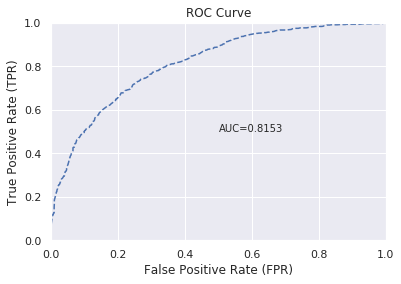

In [9]:
print(model_r.confusion_matrix())
perf = model_r.model_performance(test_r)
perf.plot()

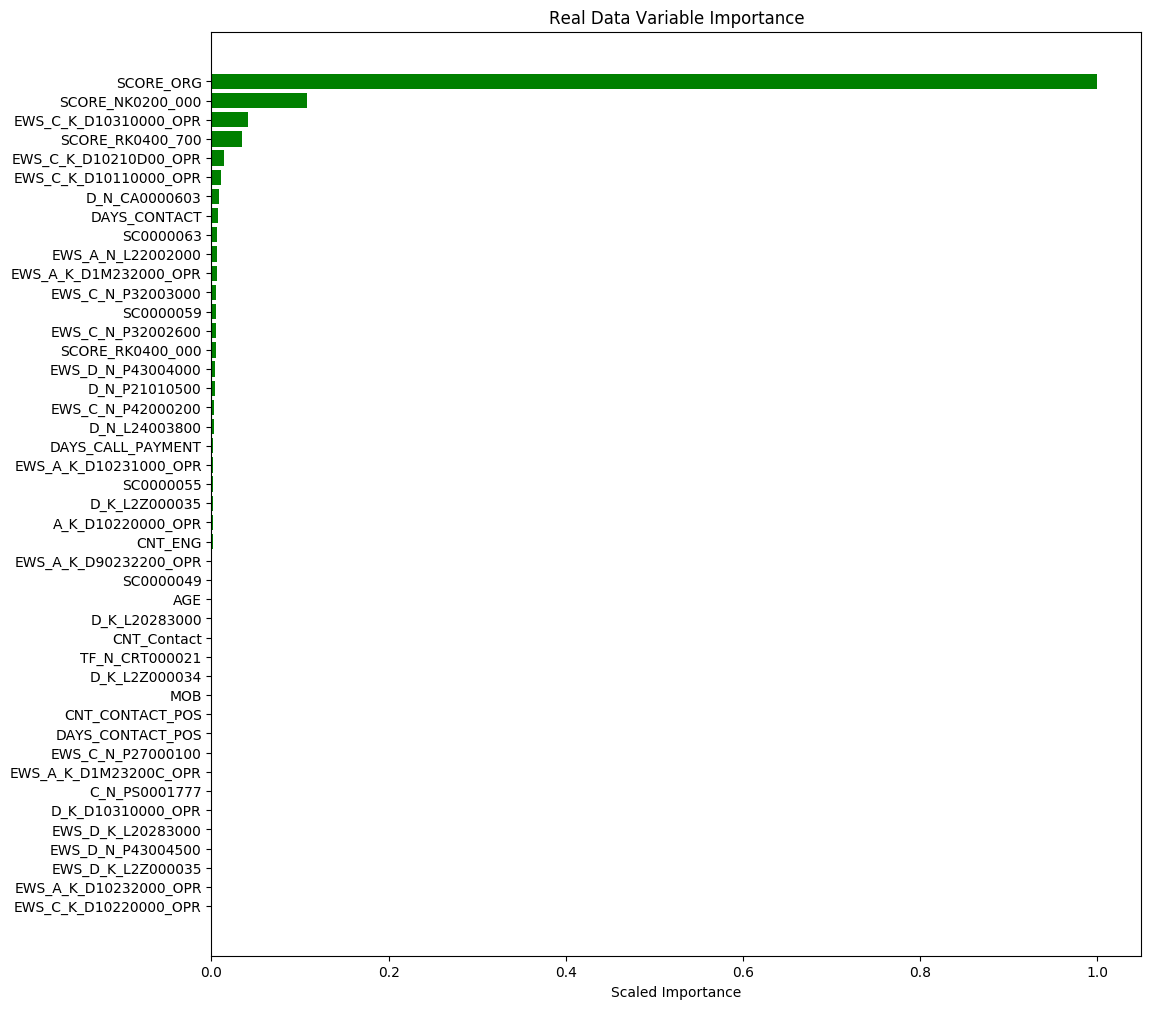

In [6]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (12,12))
variables = model_r._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model_r._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Real Data Variable Importance')
plt.show()

In [7]:
fake = pd.read_csv('./V0_SN_Generated_RsGanGp.csv',usecols =col)
#fake.drop("SCORE_ORG" , axis= 1 , inplace = True)

y = "target"
fake  = h2o.H2OFrame(fake)
fake[y] = fake[y].asfactor()
x = list(fake.columns)

x = x[:-1]
fake = fake.na_omit()
train_fake , test_fake = fake.split_frame(ratios=[0.75], seed=1)
from h2o.estimators.gbm import H2OGradientBoostingEstimator
model_fake = H2OGradientBoostingEstimator(distribution='bernoulli',
                                     balance_classes = True ,
                                     stopping_metric = "misclassification" ,
                                     ntrees=100,
                                     max_depth=4,
                                     learn_rate=0.01)

model_fake.train(x=x, y=y, training_frame=train_fake, validation_frame=test_fake)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


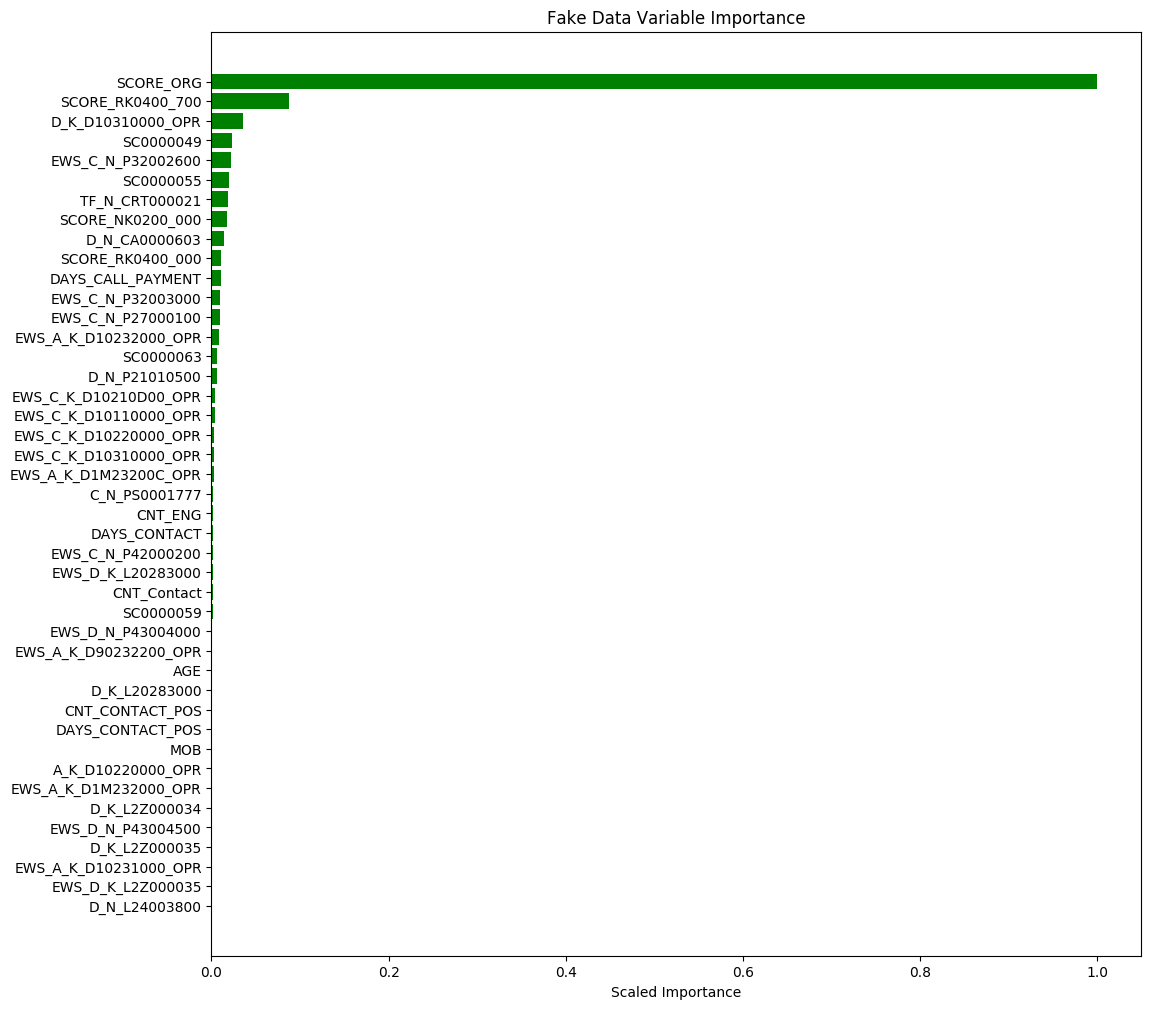

In [8]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (12,12))
variables = model_fake._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model_fake._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Fake Data Variable Importance')
plt.show()

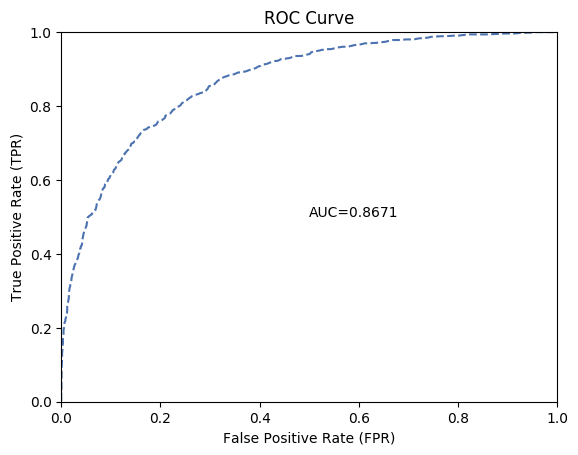

In [10]:
## 가짜 데이터로 예측
model_fake.model_performance().plot()

실제데이터 모델로 실제 데이터를 예측할 때
 
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34502285909461566: 


,0,1,Error,Rate
0,1093.0,436.0,0.2852,(436.0/1529.0)
1,214.0,699.0,0.2344,(214.0/913.0)
Total,1307.0,1135.0,0.2662,(650.0/2442.0)


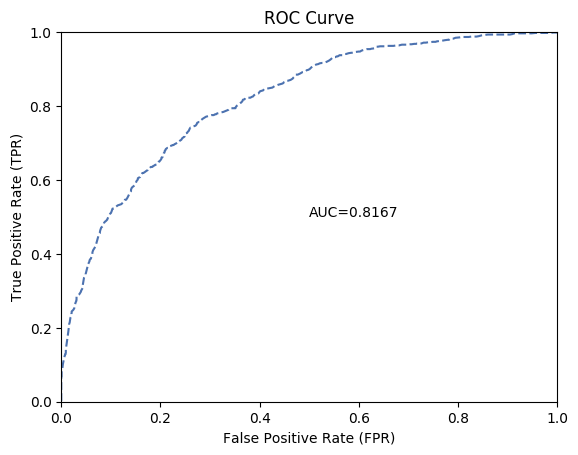

 
 
실제데이터 모델로 가짜 데이터를 예측할 때
 
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3627095008242902: 


,0,1,Error,Rate
0,583.0,194.0,0.2497,(194.0/777.0)
1,99.0,362.0,0.2148,(99.0/461.0)
Total,682.0,556.0,0.2367,(293.0/1238.0)


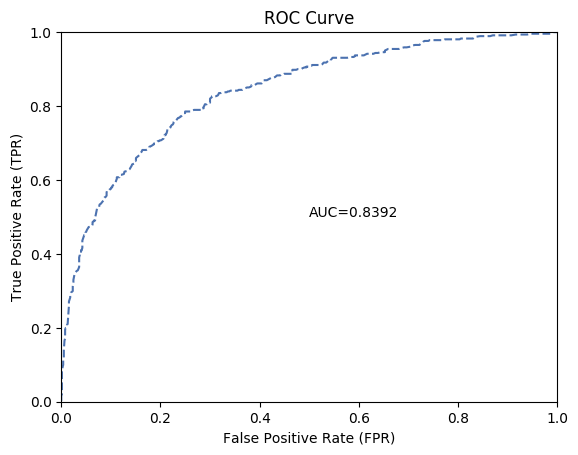

In [11]:
"""
실제데이터 모델로 가짜 데이터를 예측할 때
"""
print("실제데이터 모델로 실제 데이터를 예측할 때")
print(" ")
perf = model_r.model_performance(test_r)
print(perf.confusion_matrix())
perf.plot()
print(" ")
print(" ")
print("실제데이터 모델로 가짜 데이터를 예측할 때")
print(" ")
perf = model_r.model_performance(test_fake)
print(perf.confusion_matrix())
perf.plot()

###  실제 모델로 가짜 데이터와 예측 데이터를 넣을 때 거의 같은 성능을 보인다.

가짜 모델로 진짜 데이터를 예측할 때
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30758309484494445: 


,0,1,Error,Rate
0,1077.0,452.0,0.2956,(452.0/1529.0)
1,226.0,687.0,0.2475,(226.0/913.0)
Total,1303.0,1139.0,0.2776,(678.0/2442.0)


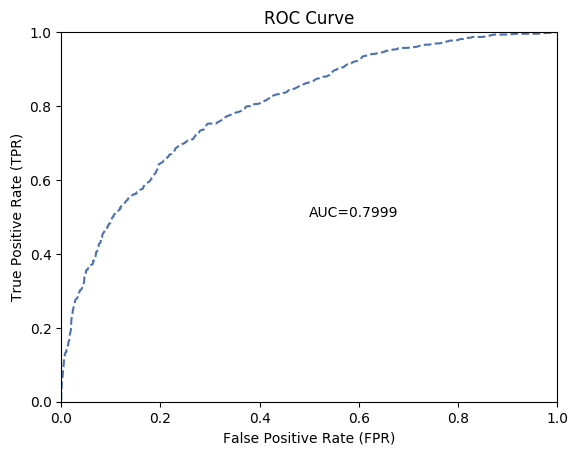

가짜 모델로 가짜 데이터를 예측할 때
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3906713383483514: 


,0,1,Error,Rate
0,660.0,117.0,0.1506,(117.0/777.0)
1,143.0,318.0,0.3102,(143.0/461.0)
Total,803.0,435.0,0.21,(260.0/1238.0)


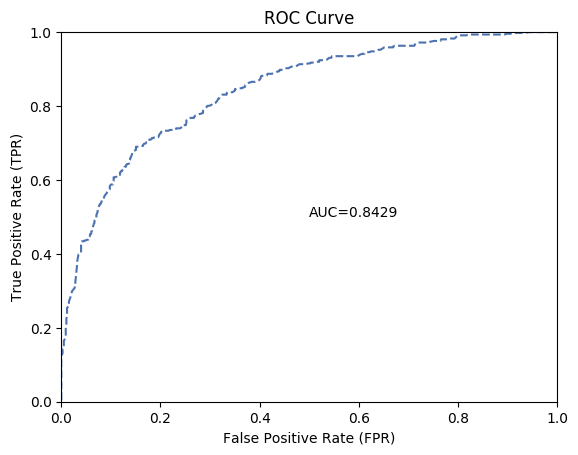

In [12]:

print("가짜 모델로 진짜 데이터를 예측할 때")
perf = model_fake.model_performance(test_r)
print(perf.confusion_matrix())
perf.plot()

print("="*100)
print("가짜 모델로 가짜 데이터를 예측할 때")

perf = model_fake.model_performance(test_fake)
print(perf.confusion_matrix())
perf.plot()



In [17]:
real = pd.read_csv('./credit44_sc.csv' ,usecols=col)
fake = pd.read_csv('./V0_SN_Generated_RsGanGp.csv',usecols =col)
fake = fake.loc[fake.target == 1 , : ]


In [18]:

total = pd.concat([real,fake] , axis = 0)


y = "target"
total  = h2o.H2OFrame(total)
total[y] = total[y].asfactor()
x = list(total.columns)

x = x[:-1]
total = total.na_omit()
total_train , total_test = total.split_frame(ratios=[0.75], seed=1)
from h2o.estimators.gbm import H2OGradientBoostingEstimator
total_model = H2OGradientBoostingEstimator(distribution='bernoulli',
                                     balance_classes = True ,
                                     stopping_metric = "misclassification" ,
                                     ntrees=100,
                                     max_depth=4,
                                     learn_rate=0.01)

total_model.train(x=x, y=y, training_frame=total_train, validation_frame=total_test)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


데이터 합쳐서 합친 데이터 평가
 
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4241499956356816: 


,0,1,Error,Rate
0,1051.0,478.0,0.3126,(478.0/1529.0)
1,256.0,1099.0,0.1889,(256.0/1355.0)
Total,1307.0,1577.0,0.2545,(734.0/2884.0)


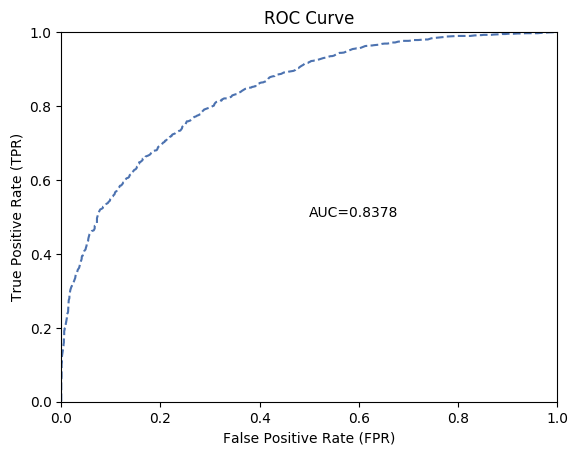

 
 
합친 데이터 모델로 실제 test 데이터 평가
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4241444921269662: 


,0,1,Error,Rate
0,1051.0,478.0,0.3126,(478.0/1529.0)
1,199.0,714.0,0.218,(199.0/913.0)
Total,1250.0,1192.0,0.2772,(677.0/2442.0)


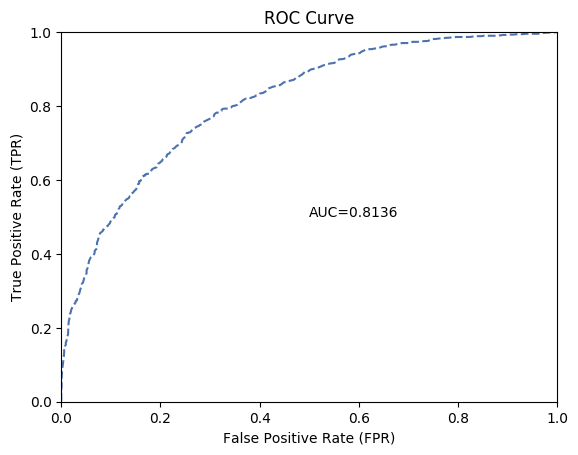

 
 
합친 데이터 모델로 Fake test 데이터 평가
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4977670131763227: 


,0,1,Error,Rate
0,579.0,198.0,0.2548,(198.0/777.0)
1,97.0,364.0,0.2104,(97.0/461.0)
Total,676.0,562.0,0.2383,(295.0/1238.0)


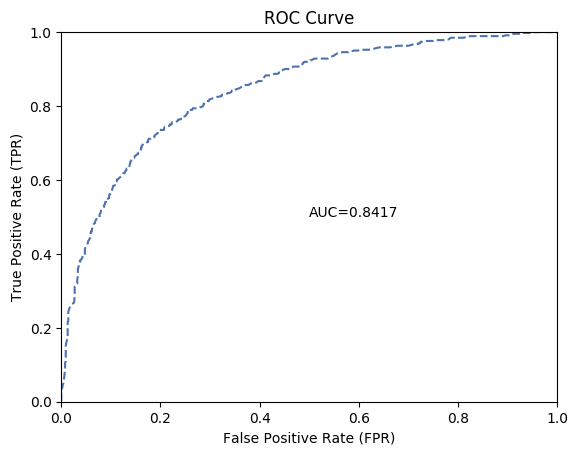

In [19]:
print("데이터 합쳐서 합친 데이터 평가")
print(" ")
perf = total_model.model_performance(total_test)
print(perf.confusion_matrix())
perf.plot()
print(" ")
print(" ")
print("합친 데이터 모델로 실제 test 데이터 평가")
perf = total_model.model_performance(test_r)
print(perf.confusion_matrix())
perf.plot()
print(" ")
print(" ")
print("합친 데이터 모델로 Fake test 데이터 평가")
perf = total_model.model_performance(test_fake)
print(perf.confusion_matrix())
perf.plot()
print(" ")

In [98]:
real = pd.read_csv('./credit44_sc.csv' ,usecols=col)
fake = pd.read_csv('./SN_M_W_Res_Generated.csv',usecols =col)
real["Real"] = 0
fake["Real"] = 1
#fake = pd.read_csv('./SN_M_W_Res_Generated.csv')
output = pd.concat([real, fake])
Target = output["Real"]
output.drop(["Real"] , inplace = True , axis = 1 )
X = output.values

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [99]:
output.reset_index(drop=True,inplace=True)

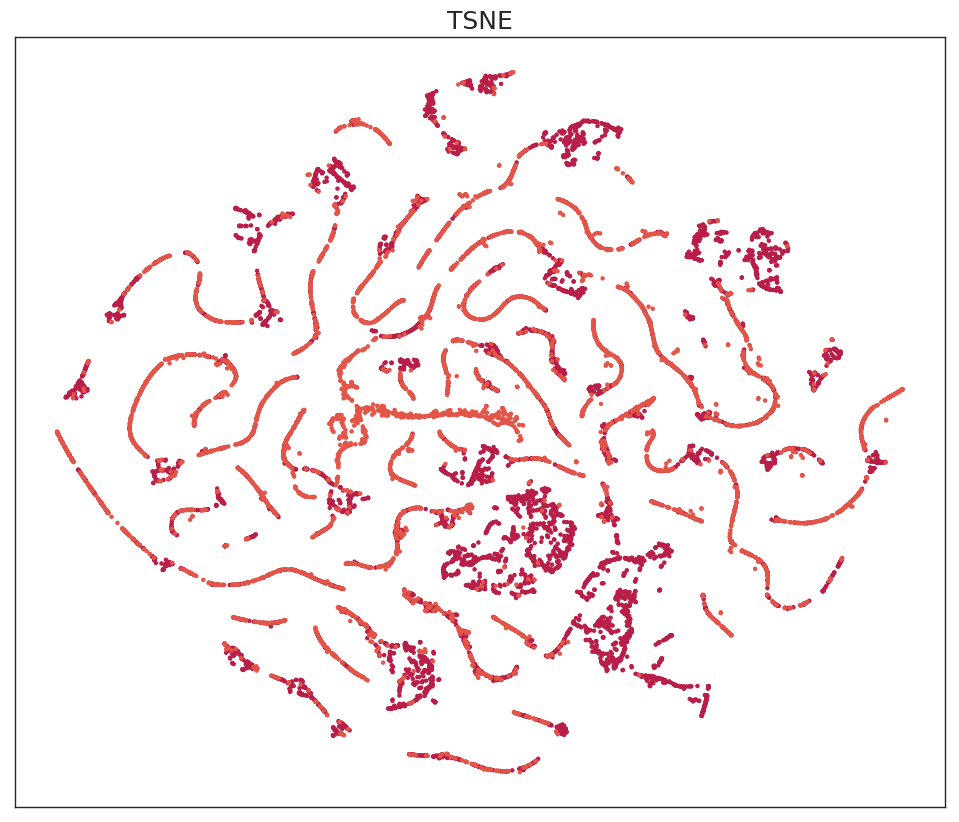

In [100]:
sns.set(context="paper", style="white")
tsne = TSNE(n_jobs=20)
embeddings = tsne.fit_transform(X)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(vis_x, vis_y, c=Target.values, cmap="Spectral", marker='.')
plt.setp(ax, xticks=[], yticks=[])
plt.title("TSNE", fontsize=18)
plt.clim(-0.5, 9.5)
plt.show()

/home/gpuadmin/.local/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


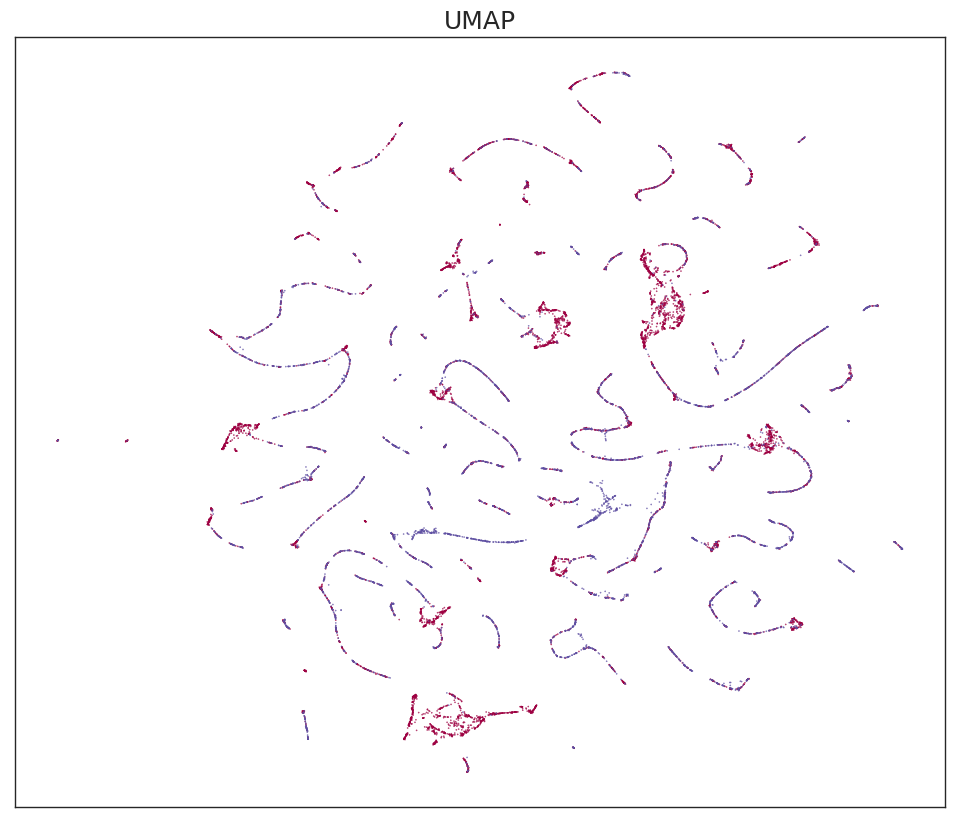

In [101]:
sns.set(context="paper", style="white")
reducer = umap.UMAP(random_state=42,)
embedding = reducer.fit_transform(X)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=Target.values, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("UMAP", fontsize=18)

plt.show()

In [52]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [62]:
X = embedding
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = Target.values